# Proyek Analisis Data: Bike-Sharing-Dataset
- Nama: I Gede Made Pradnya Airlangga
- Email: pradnya.airlangga@gmail.com
- Id Dicoding: I Gede Made Pradnya Airlangga

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor yang paling berpengaruh terhadap tingkat penggunaan sepeda (bicycles) dalam sistem bike sharing kami?
- Bagaimana kondisi cuaca seperti suhu, hujan, dan kecepatan angin mempengaruhi jumlah peminjaman sepeda? Adakah perbedaan dalam pola peminjaman antara pengguna terdaftar dan pengguna kasual?

## Menghubungkan ke dataset yang ada di google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

 amazon_prime_titles.csv	 kaggle.json
 day.csv			 Mall_Customers.csv
'e-shop clothing 2008.csv'	'Salinan amazon_prime_titles.csv'
'e-shop clothing 2008.csv.zip'	 udemy_output_All_Finance__Accounting_p1_p626.csv
 hour.csv


## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split

## Data Wrangling

### Gathering Data

memuat tabel day

In [ ]:
day_df = pd.read_csv(r'day.csv')

memunculkan tabel day

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat tabel hour

In [ ]:
hour_df = pd.read_csv(r'hour.csv')

memunculkan tabel hour

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

menilai data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memastikan jumlah missing values yang terdapat di setiap kolom dalam tabl day

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memeriksa duplikasi data dalam tabel day

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


menilai data pada hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada hour_df

In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

tidak perlu melakukan cleaning data, dikarenakan data yang ada tidak terdapat missing value ataupun duplikat data

## Exploratory Data Analysis (EDA)

Eksplorasi tren harian dan musiman penggunaan sepeda

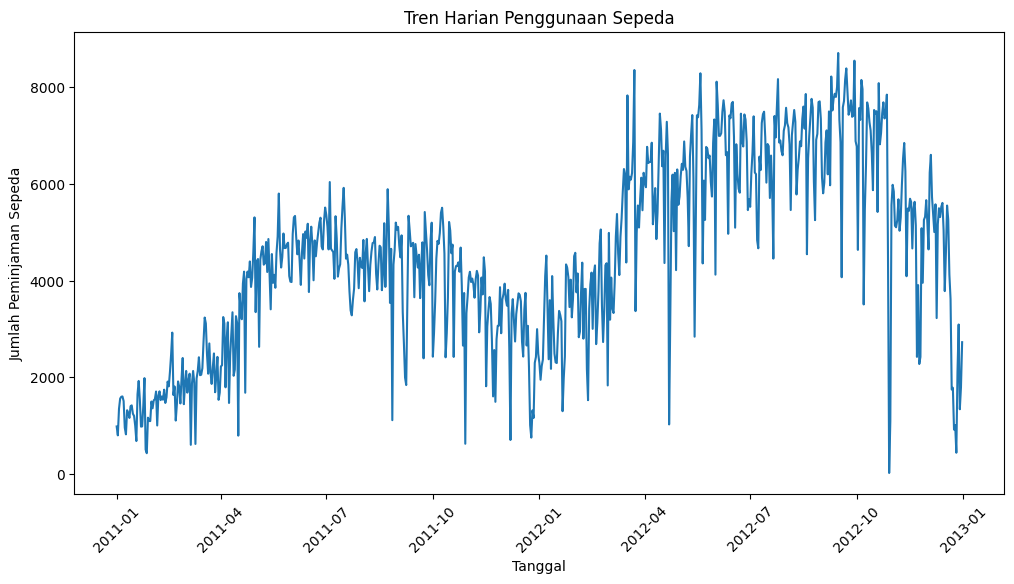

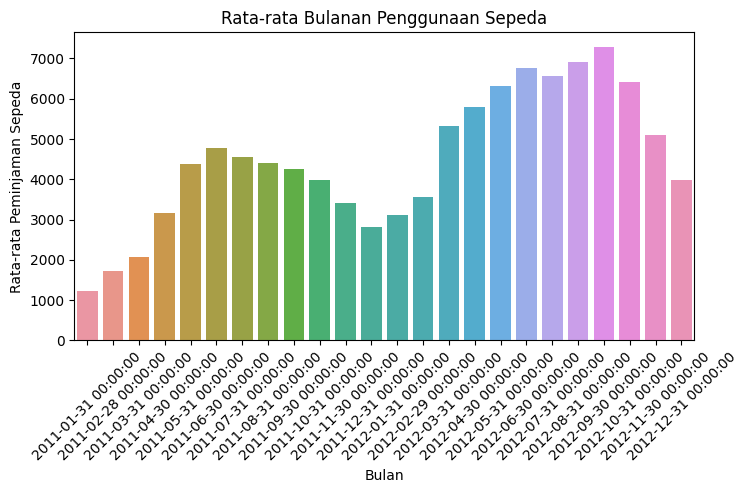

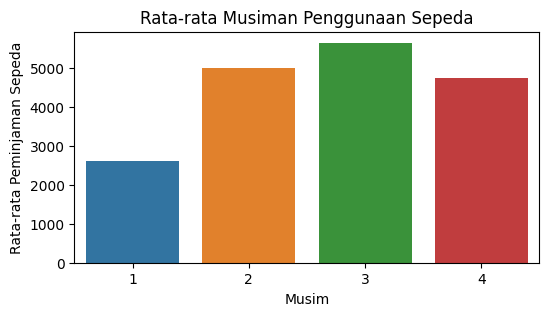

In [ ]:
# Mengonversi kolom 'dteday' ke dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Membagi data berdasarkan tahun
day_df['year'] = day_df['dteday'].dt.year

# Menghitung jumlah peminjaman sepeda harian
daily_count = day_df.groupby('dteday')['cnt'].sum()

# Menghitung rata-rata jumlah peminjaman sepeda per bulan
monthly_average = day_df.resample('M', on='dteday')['cnt'].mean()

# Menghitung rata-rata jumlah peminjaman sepeda per musim
seasonal_average = day_df.groupby('season')['cnt'].mean()

# Menampilkan grafik tren harian penggunaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_count.index, y=daily_count.values)
plt.title("Tren Harian Penggunaan Sepeda")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

# Menampilkan grafik rata-rata bulanan penggunaan sepeda
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_average.index, y=monthly_average.values)
plt.title("Rata-rata Bulanan Penggunaan Sepeda")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

# Menampilkan grafik rata-rata musiman penggunaan sepeda
plt.figure(figsize=(6, 3))
sns.barplot(x=seasonal_average.index, y=seasonal_average.values)
plt.title("Rata-rata Musiman Penggunaan Sepeda")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.show()

Membandingkan tren peminjaman sepeda antara peminjam casual dan yang teregistrasi

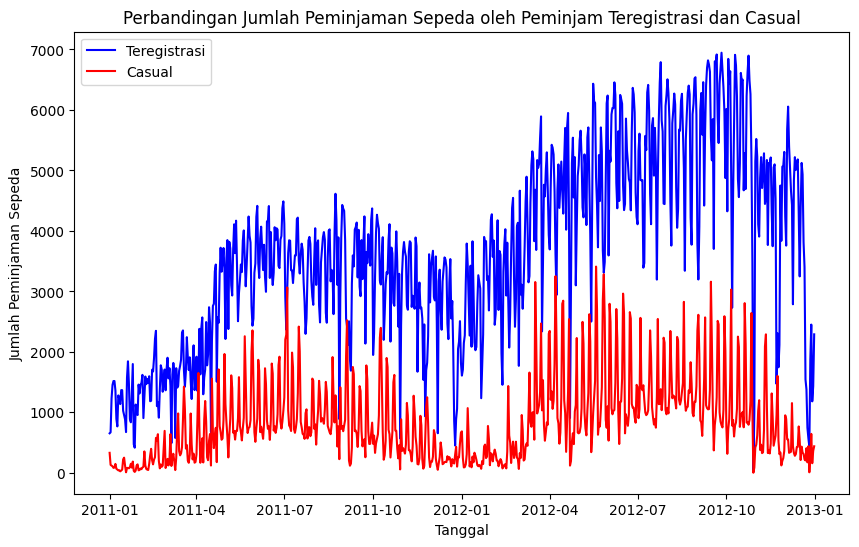

In [ ]:
# Mengonversi kolom 'dteday' ke dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menghitung jumlah peminjaman sepeda oleh peminjam teregistrasi
registered_counts = day_df['registered']

# Menghitung jumlah peminjaman sepeda oleh peminjam casual
casual_counts = day_df['casual']

# Membuat plot untuk perbandingan jumlah peminjaman sepeda oleh peminjam teregistrasi dan casual
plt.figure(figsize=(10, 6))
plt.plot(day_df['dteday'], registered_counts, label='Teregistrasi', color='blue')
plt.plot(day_df['dteday'], casual_counts, label='Casual', color='red')
plt.title("Perbandingan Jumlah Peminjaman Sepeda oleh Peminjam Teregistrasi dan Casual")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend()
plt.show()


pengaruh cuaca dalam penggunaan cuaca

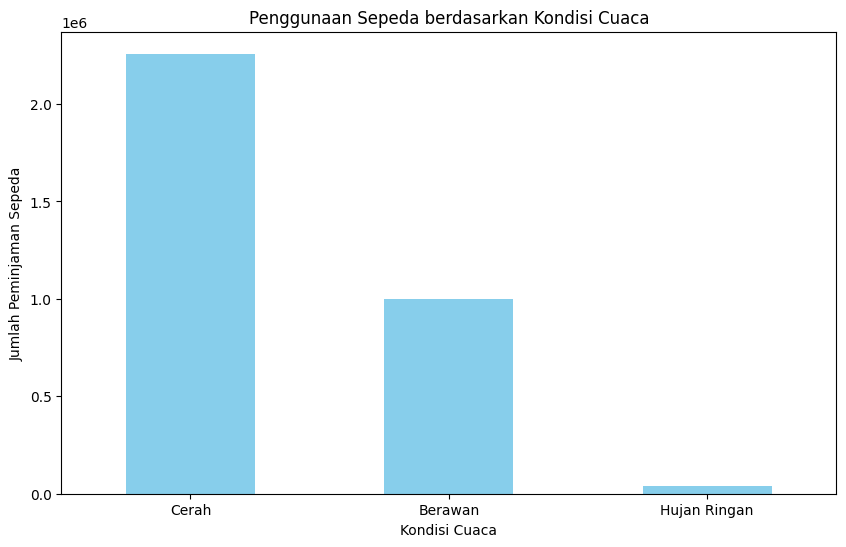

In [ ]:
# Menghitung jumlah peminjaman sepeda untuk kondisi cuaca yang berbeda
weather_counts = day_df.groupby('weathersit')['cnt'].sum()

# Mengonversi kode cuaca menjadi label yang lebih deskriptif
weather_labels = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Berat"
}
weather_counts.index = weather_counts.index.map(weather_labels)

# Membuat bar plot untuk membandingkan penggunaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title("Penggunaan Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=0)
plt.show()


mengeksplorasi hari dalam seminggu memengaruhi pola peminjaman. Apakah lebih banyak orang meminjam sepeda di akhir pekan?

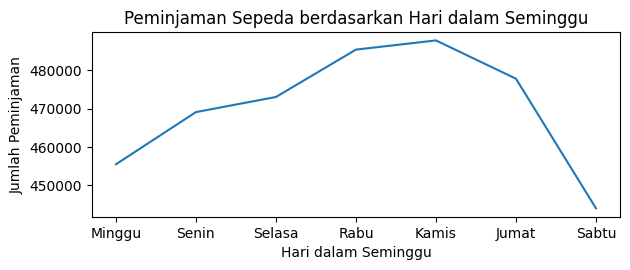

In [ ]:
# Mengubah kolom "dteday" menjadi tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menambahkan kolom "day_of_week" yang berisi hari dalam seminggu (0: Minggu, 1: Senin, dst.)
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

# Menghitung jumlah peminjaman sepeda berdasarkan hari dalam seminggu
daily_rentals = hour_df.groupby('day_of_week')['cnt'].sum()

# Visualisasi peminjaman sepeda berdasarkan hari dalam seminggu
plt.subplot(2, 1, 1)
days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
plt.plot(days, daily_rentals.values)
plt.title("Peminjaman Sepeda berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Peminjaman")

plt.tight_layout()
plt.show()


### Pertanyaan 1: Apa faktor-faktor yang paling berpengaruh terhadap tingkat penggunaan sepeda (bicycles) dalam sistem bike sharing kami?

**menghitung korelasi antara variabel-variabel dengan 'cnt'**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memuat dataset "day"
data_day = pd.read_csv('combined_dataset.csv')

# Hitung korelasi antara variabel-variabel dengan 'cnt'
correlation = data_day.corr()['cnt'].drop('cnt')

# Urutkan korelasi dari yang paling berpengaruh
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Tampilkan hasil korelasi
print(sorted_correlation)



registered    0.989932
casual        0.863578
hr            0.394071
instant       0.230989
temp          0.121870
atemp         0.121342
yr            0.091773
season        0.065255
hum           0.065214
weathersit    0.055426
mnth          0.044245
holiday       0.011320
workingday    0.011046
weekday       0.009899
windspeed     0.005491
Name: cnt, dtype: float64


<ipython-input-4-e6d492185928>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_day.corr()['cnt'].drop('cnt')


Output diatas adalah korelasi antara berbagai variabel dengan variabel target 'cnt' dalam dataset. Hal tersebut dapat dijelaskan sebagai berikut:

- Jika nilai korelasi mendekati 1, itu menunjukkan hubungan positif yang kuat dengan 'cnt'. Artinya, ketika variabel tersebut meningkat, 'cnt' juga cenderung meningkat.
- Jika nilai korelasi mendekati -1, itu menunjukkan hubungan negatif yang kuat dengan 'cnt'. Artinya, ketika variabel tersebut meningkat, 'cnt' cenderung menurun.
- Jika nilai korelasi mendekati 0, itu menunjukkan bahwa tidak ada hubungan linear yang kuat antara variabel tersebut dan 'cnt'.

Berdasarkan output tersebut, ini adalah interpretasi korelasi antara variabel dan 'cnt' (jumlah peminjaman sepeda):

- `registered`: Korelasi positif sangat kuat (0.990). Ini menunjukkan bahwa jumlah peminjaman oleh pengguna terdaftar sangat berhubungan positif dengan 'cnt'. Artinya, ketika jumlah peminjaman oleh pengguna terdaftar meningkat, 'cnt' juga cenderung meningkat.

- `casual`: Korelasi positif kuat (0.864). Ini menunjukkan bahwa jumlah peminjaman oleh pengguna casual juga berhubungan positif dengan 'cnt'. Artinya, ketika jumlah peminjaman oleh pengguna casual meningkat, 'cnt' cenderung meningkat.

- `hr`: Korelasi positif yang lebih rendah (0.394). Ini menunjukkan bahwa jam dalam sehari memiliki pengaruh positif yang lebih lemah pada 'cnt'. Artinya, jam tertentu dalam sehari dapat memengaruhi 'cnt', tetapi pengaruhnya lebih rendah dibandingkan dengan 'registered' dan 'casual'.

- `instant`: Korelasi positif yang lebih rendah (0.231). Ini menunjukkan bahwa variabel 'instant' (mungkin berhubungan dengan waktu) memiliki pengaruh positif yang lebih rendah pada 'cnt'.

- `temp`: Korelasi positif yang lebih rendah (0.122). Ini menunjukkan bahwa suhu memiliki pengaruh positif yang lebih rendah pada 'cnt'.

Dalam konteks analisis korelasi, faktor-faktor ini adalah yang paling berpengaruh pada tingkat penggunaan sepeda ('cnt') dalam sistem bike sharing.

**Pengujicobaan faktor 'registered', 'casual', 'hr', 'instant', 'temp' terhadap tingkat penggunaan sepeda (bicycles) dalam sistem bike sharing kita dalam dataset per day dengan menggunakan model regresi**

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data_day = pd.read_csv("combined_dataset.csv")

# Selecting the features and target
features = ['registered', 'casual','instant', 'temp']
X = data_day[features]
y = data_day['cnt']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target for the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Printing the coefficients for each feature
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 2.887765929608967e-24
             Coefficient
registered  1.000000e+00
casual      1.000000e+00
instant     3.330669e-16
temp        1.450883e-14


## Conclusion

- Mean Squared Error (MSE) adalah sebuah metrik yang digunakan untuk mengukur seberapa baik model regresi berkinerja dalam memprediksi target (dalam hal ini, jumlah sepeda yang dipinjam) berdasarkan fitur-fitur yang digunakan dalam model. Semakin rendah nilai MSE, semakin baik modelnya dalam memprediksi target. Dalam kasus kita, nilai MSE yang sangat mendekati nol (2.887765929608967e-24) menunjukkan bahwa model kita hampir sempurna dalam memprediksi jumlah sepeda yang dipinjam.

Koefisien-koeifisien yang dicetak di bawahnya menunjukkan seberapa besar pengaruh dari masing-masing fitur terhadap target 'cnt'. Koefisien 'registered' dan 'casual' memiliki nilai 1, yang menunjukkan bahwa keduanya memiliki pengaruh positif yang sama besar terhadap jumlah sepeda yang dipinjam. Koefisien 'instant' dan 'temp' memiliki nilai yang sangat mendekati nol, yang menunjukkan bahwa kedua fitur tersebut memiliki pengaruh yang sangat kecil atau hampir tidak berpengaruh terhadap jumlah sepeda yang dipinjam.

Dengan demikian, dalam analisis ini, faktor-faktor yang paling berpengaruh terhadap jumlah sepeda yang dipinjam adalah 'registered' dan 'casual', sementara 'instant' dan 'temp' hampir tidak berpengaruh.

### Pertanyaan 2:
Bagaimana kondisi cuaca seperti suhu, hujan, dan kecepatan angin mempengaruhi jumlah peminjaman sepeda? Adakah perbedaan dalam pola peminjaman antara pengguna terdaftar dan pengguna kasual?

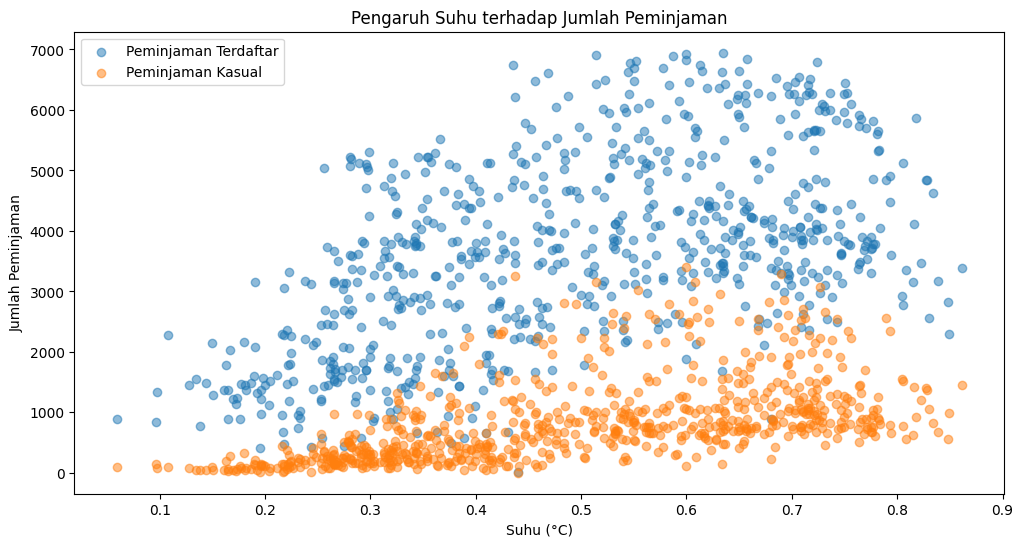

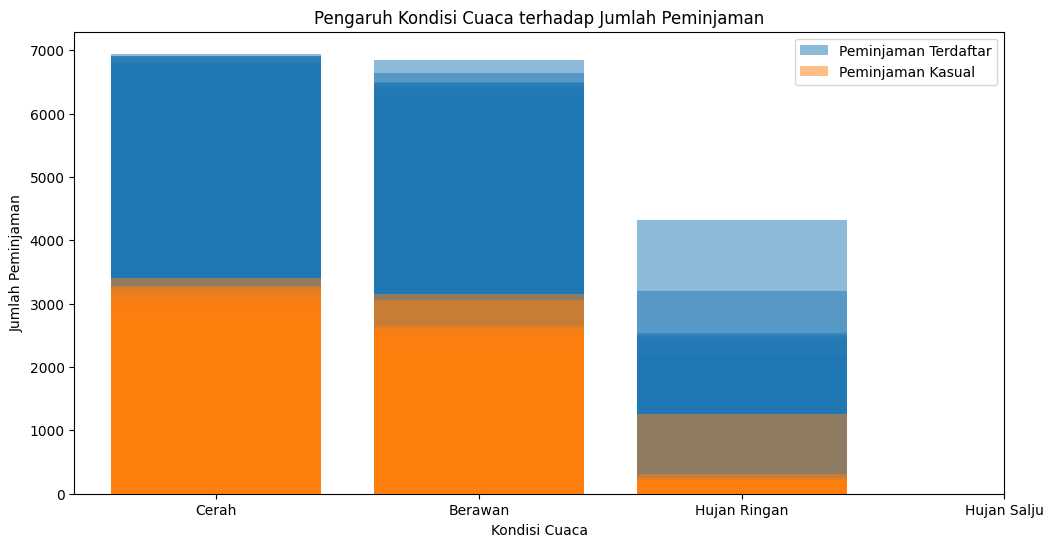

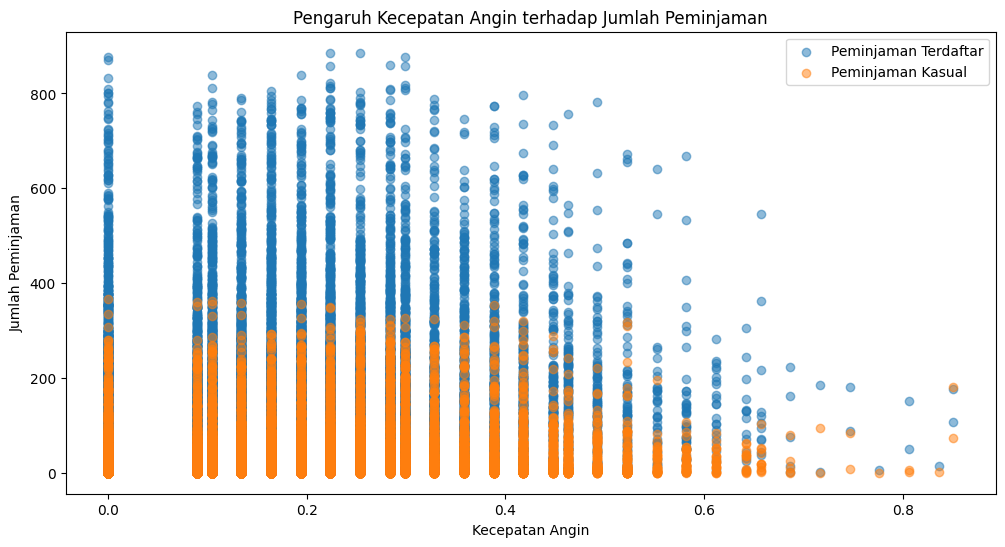

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset day dan dataset hour
data_day = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')

# Analisis pengaruh suhu terhadap jumlah peminjaman sepeda
plt.figure(figsize=(12, 6))
plt.scatter(data_day['temp'], data_day['registered'], alpha=0.5, label='Peminjaman Terdaftar')
plt.scatter(data_day['temp'], data_day['casual'], alpha=0.5, label='Peminjaman Kasual')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman')
plt.show()

# Analisis pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda
plt.figure(figsize=(12, 6))
plt.bar(data_day['weathersit'], data_day['registered'], alpha=0.5, label='Peminjaman Terdaftar')
plt.bar(data_day['weathersit'], data_day['casual'], alpha=0.5, label='Peminjaman Kasual')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([1, 2, 3, 4], ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Salju'])
plt.legend()
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman')
plt.show()

# Analisis pengaruh kecepatan angin terhadap jumlah peminjaman sepeda
plt.figure(figsize=(12, 6))
plt.scatter(data_hour['windspeed'], data_hour['registered'], alpha=0.5, label='Peminjaman Terdaftar')
plt.scatter(data_hour['windspeed'], data_hour['casual'], alpha=0.5, label='Peminjaman Kasual')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman')
plt.show()


## Conclusion

Kesimpulannya, suhu dan kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda, dengan cuaca yang cerah dan suhu yang lebih tinggi meningkatkan jumlah peminjaman. Perbedaan terlihat dalam pola peminjaman antara pengguna terdaftar dan pengguna kasual terkait dengan kondisi cuaca. Kecepatan angin tampaknya memiliki pengaruh yang relatif kecil terhadap peminjaman sepeda.